Transformers library [Transformers Hugging Face Library 🤗](https://huggingface.co/docs/transformers/en/index)

# Building an LLM (Large Language Model)

## Import the required libraries and tools

In [ ]:
import requests # To read the dataset
import numpy as np # fast array computations
import tensorflow as tf # for building deep learning models (LLM models)
from transformers import GPT2Tokenizer # 🤗 by Hugging Face
import pandas as pd # to store the history records and plot the loss curve

In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
encoded = tokenizer.encode("Python is really great")
print(f"Encoded Version: {encoded}")
decoded = tokenizer.decode(encoded)
print(f"Decoded Version: {decoded}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Encoded Version: [37906, 318, 1107, 1049]
Decoded Version: Python is really great


**Tokenization** shows the text as a series of tokens or useful meaningful units that are larger than individual characters, but smaller than phrases and sentences.

## Get the data to model it!

In [ ]:
response = requests.get("https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/Practical_labs/Data+Science+and+Data+Analysis+Tables+%26+comparisons.txt")

In [ ]:
response.status_code

200

In [ ]:
response.text

'\r\n\r\n\r\nComparisons in Data Science and AI Bootcamp - Programming Ocean Academy-2024\r\nProgramming Ocean Academy - Data Storge and Processing\rAspect\rWarehouse\rLake\rPipeline\rDatabase\rData Mart\rPurpose\rStores structured data for analysis\rStores both structured and unstructured data\rTransfers data from one system to another\rStores structured data efficiently\rSubset of a data warehouse tailored for specific business line or department\rData Type\rPrimarily structured\rBoth structured and unstructured\rTypically structured\rStructured data\rStructured data\rScale\rCan handle large volumes of data\rDesigned for massive data storage\rDesigned for data movement\rScales according to capacity\rSmaller subset of a data warehouse\rProcessing\rMay involve data transformation\rCan store data without prior schema definition\rDirects data flow without altering content\rMay involve complex querying\rFocuses on specific business needs\rAccess Pattern\rRead-intensive for analytics\rRead

In [ ]:
data

'\r\n\r\n\r\nComparisons in Data Science and AI Bootcamp - Programming Ocean Academy-2024\r\nProgramming Ocean Academy - Data Storge and Processing\rAspect\rWarehouse\rLake\rPipeline\rDatabase\rData Mart\rPurpose\rStores structured data for analysis\rStores both structured and unstructured data\rTransfers data from one system to another\rStores structured data efficiently\rSubset of a data warehouse tailored for specific business line or department\rData Type\rPrimarily structured\rBoth structured and unstructured\rTypically structured\rStructured data\rStructured data\rScale\rCan handle large volumes of data\rDesigned for massive data storage\rDesigned for data movement\rScales according to capacity\rSmaller subset of a data warehouse\rProcessing\rMay involve data transformation\rCan store data without prior schema definition\rDirects data flow without altering content\rMay involve complex querying\rFocuses on specific business needs\rAccess Pattern\rRead-intensive for analytics\rRead

## Read the text dataset

In [ ]:
# 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt'


url = 'https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/Practical_labs/Data+Science+and+Data+Analysis+Tables+%26+comparisons.txt'
response = requests.get(url)
print(response.status_code)
data = response.text

200


In [ ]:
len(data)

241660

In [ ]:
type(response.text)

str

## Convert the text data into tokens (Sub units)

Tokenisation Types:
1. Character
2. Word
3. SubWord Tokenisation
4. Sentence-Level Tokenisation

In [ ]:
# Load GPT-2 tokenizer from Hugging Face
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to EOS token for consistency

# Tokenize the dataset (convert text to tokens)
tokenized_text = tokenizer.encode(data)
print(tokenized_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (53797 > 1024). Running this sequence through the model will result in indexing errors


[201, 198, 201, 198, 201, 198, 50249, 9886, 287, 6060, 5800, 290, 9552, 18892, 16544, 532, 30297, 10692, 8581, 12, 1238, 1731, 201, 198, 15167, 2229, 10692, 8581, 532, 6060, 520, 3643, 290, 28403, 201, 1722, 806, 201, 38824, 4803, 201, 43035, 201, 47, 541, 4470, 201, 38105, 201, 6601, 3981, 201, 30026, 3455, 201, 1273, 2850, 20793, 1366, 329, 3781, 201, 1273, 2850, 1111, 20793, 290, 555, 7249, 1522, 1366, 201, 8291, 69, 364, 1366, 422, 530, 1080, 284, 1194, 201, 1273, 2850, 20793, 1366, 18306, 201, 7004, 2617, 286, 257, 1366, 20933, 27571, 329, 2176, 1597, 1627, 393, 5011, 201, 6601, 5994, 201, 23828, 3093, 20793, 201, 10265, 20793, 290, 555, 7249, 1522, 201, 49321, 20793, 201, 44909, 1522, 1366, 201, 44909, 1522, 1366, 201, 29990, 201, 6090, 5412, 1588, 15343, 286, 1366, 201, 5960, 3916, 329, 4858, 1366, 6143, 201, 5960, 3916, 329, 1366, 3356, 201, 3351, 2040, 1864, 284, 5339, 201, 18712, 263, 24637, 286, 257, 1366, 20933, 201, 18709, 278, 201, 6747, 6211, 1366, 13389, 201, 6090, 3650

In [ ]:
my_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# We have to convert (transoform) data into numbers (numerical form)

text = "Students will succeed" # Text String

# Tokenize the sentence
encoded_text = my_tokenizer.encode(text)
print(f"the encoded version is {encoded_text}")

decoded_text = my_tokenizer.decode(encoded_text)
print(f"The decoded version is {decoded_text}")

the encoded version is [28239, 481, 6758]
The decoded version is Students will succeed


Step 4: Prepare Input and Output Sequences

## Create input and output pairs

In [ ]:
maxlen = 512  # Maximum sequence length Limits the size of each input sequence.

# Create input-output pairs (sequence generation)
input_sequences = [] # empty list
output_sequences = [] # empty list

# Sliding window over the tokenized text to create input-output pairs
for i in range(0, len(tokenized_text) - maxlen):
    input_sequences.append(tokenized_text[i:i + maxlen])
    output_sequences.append(tokenized_text[i + 1:i + maxlen + 1])  # Shift by 1 for the output


# Convert to numpy arrays
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)


In [ ]:
input_sequences

array([[  201,   198,   201, ...,   770, 11523, 19047],
       [  198,   201,   198, ..., 11523, 19047,   326],
       [  201,   198,   201, ..., 19047,   326,   262],
       ...,
       [  290,  2324,  9073, ...,    13,   201,   201],
       [ 2324,  9073,    13, ...,   201,   201,   198],
       [ 9073,    13,   201, ...,   201,   198,   201]])

In [ ]:
output_sequences

array([[  198,   201,   198, ..., 11523, 19047,   326],
       [  201,   198,   201, ..., 19047,   326,   262],
       [  198,   201,   198, ...,   326,   262,  1366],
       ...,
       [ 2324,  9073,    13, ...,   201,   201,   198],
       [ 9073,    13,   201, ...,   201,   198,   201],
       [   13,   201,  5159, ...,   198,   201,   198]])

In [ ]:
tokenizer.decode(list(input_sequences[0]))

"\r\n\r\n\r\nComparisons in Data Science and AI Bootcamp - Programming Ocean Academy-2024\r\nProgramming Ocean Academy - Data Storge and Processing\rAspect\rWarehouse\rLake\rPipeline\rDatabase\rData Mart\rPurpose\rStores structured data for analysis\rStores both structured and unstructured data\rTransfers data from one system to another\rStores structured data efficiently\rSubset of a data warehouse tailored for specific business line or department\rData Type\rPrimarily structured\rBoth structured and unstructured\rTypically structured\rStructured data\rStructured data\rScale\rCan handle large volumes of data\rDesigned for massive data storage\rDesigned for data movement\rScales according to capacity\rSmaller subset of a data warehouse\rProcessing\rMay involve data transformation\rCan store data without prior schema definition\rDirects data flow without altering content\rMay involve complex querying\rFocuses on specific business needs\rAccess Pattern\rRead-intensive for analytics\rRead

In [ ]:
len(input_sequences[0])

512

In [ ]:
len(output_sequences[0])

512

In [ ]:
token_ids = list(input_sequences[0])
token_ids

[201,
 198,
 201,
 198,
 201,
 198,
 50249,
 9886,
 287,
 6060,
 5800,
 290,
 9552,
 18892,
 16544,
 532,
 30297,
 10692,
 8581,
 12,
 1238,
 1731,
 201,
 198,
 15167,
 2229,
 10692,
 8581,
 532,
 6060,
 520,
 3643,
 290,
 28403,
 201,
 1722,
 806,
 201,
 38824,
 4803,
 201,
 43035,
 201,
 47,
 541,
 4470,
 201,
 38105,
 201,
 6601,
 3981,
 201,
 30026,
 3455,
 201,
 1273,
 2850,
 20793,
 1366,
 329,
 3781,
 201,
 1273,
 2850,
 1111,
 20793,
 290,
 555,
 7249,
 1522,
 1366,
 201,
 8291,
 69,
 364,
 1366,
 422,
 530,
 1080,
 284,
 1194,
 201,
 1273,
 2850,
 20793,
 1366,
 18306,
 201,
 7004,
 2617,
 286,
 257,
 1366,
 20933,
 27571,
 329,
 2176,
 1597,
 1627,
 393,
 5011,
 201,
 6601,
 5994,
 201,
 23828,
 3093,
 20793,
 201,
 10265,
 20793,
 290,
 555,
 7249,
 1522,
 201,
 49321,
 20793,
 201,
 44909,
 1522,
 1366,
 201,
 44909,
 1522,
 1366,
 201,
 29990,
 201,
 6090,
 5412,
 1588,
 15343,
 286,
 1366,
 201,
 5960,
 3916,
 329,
 4858,
 1366,
 6143,
 201,
 5960,
 3916,
 329,
 1366,
 33

In [ ]:
tokenizer.decode(token_ids)

"\r\n\r\n\r\nComparisons in Data Science and AI Bootcamp - Programming Ocean Academy-2024\r\nProgramming Ocean Academy - Data Storge and Processing\rAspect\rWarehouse\rLake\rPipeline\rDatabase\rData Mart\rPurpose\rStores structured data for analysis\rStores both structured and unstructured data\rTransfers data from one system to another\rStores structured data efficiently\rSubset of a data warehouse tailored for specific business line or department\rData Type\rPrimarily structured\rBoth structured and unstructured\rTypically structured\rStructured data\rStructured data\rScale\rCan handle large volumes of data\rDesigned for massive data storage\rDesigned for data movement\rScales according to capacity\rSmaller subset of a data warehouse\rProcessing\rMay involve data transformation\rCan store data without prior schema definition\rDirects data flow without altering content\rMay involve complex querying\rFocuses on specific business needs\rAccess Pattern\rRead-intensive for analytics\rRead

<font size="5" color="yellow">
Semantic meaning (المعنى و الاشارة الدلالية للكلمات)
<br>
Context meaning ( المعنى و الاشارة و الدلالة السياقية للكلمات)

</font>

## Creating the model

In [ ]:
tf.keras.layers.Dropout(rate=0.5)(np.array([[2, 3, 4, 5, 6, 7]]))

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[2, 3, 4, 5, 6, 7]])>

In [ ]:
class GPTBlock(tf.keras.layers.Layer):


    # Allows integration with Keras workflows (e.g., training, saving, etc.).


    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):


    # embed_dim: The size of the embedding vectors for each token (input dimensionality).
    # num_heads = num_heads: Number of parallel attention heads that understand the prompt.

    # ff_dim: The size of the intermediate layer in the feed-forward network (hidden layer dimensionality).
    # rate: The dropout rate, controlling how much data is randomly ignored during training to prevent overfitting.


        super(GPTBlock, self).__init__()

    # super : Calls the parent class (tf.keras.layers.Layer) to ensure proper initialization.


        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

    # key_dim = Dimensionality of the query (Q) and key vectors (K) in the attention mechanism (Q, K)
    # Purpose: Captures relationships between tokens by comparing the similarity of their representations.

        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation='relu'),

    # ff_dim: Expands the dimensionality to ff_dim using the ReLU activation function for non-linearity.
    # Purpose: Adds complexity to the model, enabling it to learn richer features.


            tf.keras.layers.Dense(embed_dim),

    #Projects the intermediate representation back to the original embed_dim.
    #Purpose: Ensures that the output dimension matches the input dimension.
    ## Purpose: Adds richness to the representation.




        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6) # residual connections

    #Ensures stable training by normalizing activations.
    #Typically added before or after the attention and FFN layers.
    #Stabilizes training and preserves original information.





        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    # Dropout(rate) : Randomly zeroes out a fraction of activations during training to prevent overfitting.


    # This block is a core component of transformer-based architectures, forming the backbone of large language models.

    def call(self, inputs, training):


        attn_output = self.att(inputs, inputs) # recieves two parameters = num_head and key_dim


        attn_output = self.dropout1(attn_output, training=training) #training ensures that dorpout happens during training
        #not during inference mode


        out1 = self.layernorm1(inputs + attn_output) # Residual Connections to preserve the flow of information through layers

        #Residual Connections here applied through Adding process
        #A residual connection ensures that the input to a layer (or sub-layer) is added directly to its output.
        #This is essential in deep networks like transformers because:

        #It helps prevent vanishing gradients.
        #It allows the model to learn identity mappings, making optimization easier.

        ffn_output = self.ffn(out1)


        ffn_output = self.dropout2(ffn_output, training=training)

         #dropout to prevent overfitting


        return self.layernorm2(out1 + ffn_output)

        #Residual Connection element-wise additions to keep all the information gained from all learning layers



        # Each block is responsible for processing the input sequence, refining its representation by applying:
        # Multi-head attention.
        # Feed-forward networks.
        # Residual connections and layer normalization.





# Input Shape: (batch_size, sequence_length, embed_dim)
# Output Shape: (batch_size, sequence_length, vocab_size)

In [ ]:
class GPT(tf.keras.Model):

   # The base class for building trainable models in TensorFlow/Keras.
   # It manages the model's layers, training, saving, and evaluation.

    def __init__(self, vocab_size, maxlen, embed_dim, num_heads, ff_dim, num_blocks, rate=0.1):

   # vocab_size: The number of unique tokens in the model's vocabulary.
   # maxlen: Maximum sequence length (number of tokens) the model can process.
   # embed_dim: Size of the embedding vectors for each token.
   # num_heads: Number of attention heads in the multi-head attention mechanism.
   # ff_dim: Dimensionality of the feed-forward network in each block.
   # num_blocks: Number of transformer blocks to stack.
   # rate: Dropout rate for regularization and prevent overfitting.


        super(GPT, self).__init__()

        self.embed_dim = embed_dim
        self.token_embed = tf.keras.layers.Embedding(vocab_size, embed_dim)  # Embedding Layer

    # Purpose:Converts each token (represented as an integer ID) into a dense continous floated vector of size embed_dim.




        self.pos_embed = tf.keras.layers.Embedding(maxlen, embed_dim) # Positional Encoding


    # Purpose: Adds information about the position (order - contextual meaning) of each token in the sequence.
    #Unlike RNNs, Transformers models do not inherently understand order, so positional embeddings are crucial.





        self.blocks = [GPTBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_blocks)]


     # Purpose: Stacks multiple transformer blocks (using your GPTBlock class) why ?

     # to increase the model's capacity and learn hierarchical patterns.


        self.final_layer = tf.keras.layers.Dense(vocab_size)


   # Purpose: Projects the output embeddings of the final transformer block into the vocabulary space.
   # Produces logits (raw scores) for each token in the vocabulary.
   # Why It's Necessary:
   # Converts the learned representations back to the vocabulary space for token prediction.



    def call(self, inputs, training=None):
        positions = tf.range(start=0, limit=tf.shape(inputs)[-1], delta=1) #learnable positional encoding way.

      # tf.range() is simply generating the position indices for the tokens in the sequence,
      # which are then mapped to learnable vectors via the Embedding layer.
      # Why It's Necessary: Positional information is required to understand the
      # order of tokens in the sequence since transformers process sequences in parallel without inherent ordering.




        x = self.token_embed(inputs) + self.pos_embed(positions)

        #Purpose: Combines token embeddings and positional embeddings to create position-aware token representations.

        # we add the semantic meaning + contextual meaning

        # This way using the learnable positional embeddings




        # Apply transformer blocks
        for block in self.blocks:
            x = block(x, training=training)

        # Each block is responsible for processing the input sequence, refining its representation by applying:
        # Multi-head attention.
        # Feed-forward networks.
        # Residual connections and layer normalization.

        # training=training to Ensures that dropout is applied during training
        #but not during inference.




        # Final linear layer for token prediction
        return self.final_layer(x)

        # Purpose:Projects the final output of the transformer blocks into the vocabulary space,
        #preparing it for token prediction.


        # Function:
        #Converts each token's refined embedding into a vector of raw scores (logits) for every token in the vocabulary.
        #Each logit represents the model's confidence that a particular token should come next in the sequence.


        # Why It's Necessary:

# The transformer blocks output token representations,
#but these must be mapped to specific tokens in the vocabulary for prediction.
# The final dense layer achieves this mapping by producing a score (logit) for each vocabulary token.







#Overall Workflow

##Input:

#The input sequence (x) consists of token embeddings enriched with positional information.

#Transformer Blocks:

#The input passes through a series of transformer blocks, which iteratively refine the representation of each token.

#Each block applies multi-head attention and feed-forward operations, incorporating context from the entire sequence.

#Final Layer:

#After processing through all blocks, the final representation is projected into the vocabulary space using a dense layer.

#The output logits are used for token prediction.










In [ ]:
classes = ["lion", "tiger"]
classes[1] # lookup

'tiger'

In [ ]:
import tensorflow as tf
tf.range(0, 10, 2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>

<font size="5" color="yellow">
$$
Attention(Q, K, V) = Softmax(\frac{QK^T}{\sqrt{d_k}})V
$$
</font>

<font color="yellow" size="5">
$$
FFN(x) = ReLU(x * W_1 + b_10) * W_2 + b_2
$$
</font>

<font color="yellow" size=5>
$$
Normalized Output = \frac{x-\mu}{\sqrt{\sigma^2+ϵ}}
$$
</font>

Step 6: Create the Model and Compile

In [ ]:
tokenizer.vocab_size

50257

In [ ]:
vocab_size = tokenizer.vocab_size  # Get vocab size from tokenizer
embed_dim = 256  # Embedding dimension
num_heads = 4    # Number of attention heads
ff_dim = 1024    # Feed-forward network dimension
num_blocks = 4   # Number of transformer layers (blocks)

     #Each block is responsible for processing the input sequence, refining its representation by applying:
     # 1. Multi-head attention.
     # 2. Feed-forward networks.
     # 3. Residual connections and layer normalization.

# Instantiate the model
gpt_model = GPT(vocab_size, maxlen, embed_dim, num_heads, ff_dim, num_blocks)

# Compile the model
gpt_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


In [ ]:
probability_dist = np.array([0.7, 0.1, 0.2])
classes = ["lion", "tiger", "lizard"]
index = probability_dist.argmax() # Returns the index with the largest probability value
classes[index]

'lion'

Step 7: Train the Model

In [ ]:
# Train the model
history = gpt_model.fit(input_sequences, output_sequences, epochs=2, batch_size=32)


Epoch 1/2
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 533s 292ms/step - loss: 12.1730
Epoch 2/2
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 455s 273ms/step - loss: 11.9377


<Axes: title={'center': 'Learning Curve'}, xlabel='Epochs', ylabel='Loss'>

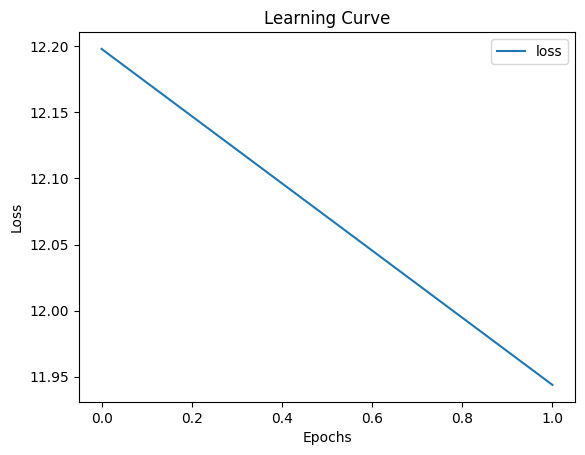

In [ ]:
pd.DataFrame(history.history).plot(title="Learning Curve", xlabel="Epochs", ylabel="Loss")

In [ ]:
gpt_model.save('gpt_model.keras')

Step 8: Generate Text from the Trained Model

In [ ]:
def generate_text(model, tokenizer, prompt, maxlen, length=1000):
    input_ids = tokenizer.encode(prompt, return_tensors='tf')
    input_ids = tf.reshape(input_ids, (1, -1))

    for _ in range(length):
        output = model(input_ids) # y = f(x)
        predicted_id = tf.argmax(output[:, -1, :], axis=-1)
        input_ids = tf.concat([input_ids, tf.cast(tf.reshape(predicted_id, (1, 1)), dtype=tf.int32)], axis=1)

    return tokenizer.decode(input_ids.numpy()[0])

# Test the model with a simple prompt
prompt = """

What is Data Science?
"""
generated_text = generate_text(gpt_model, tokenizer, prompt, maxlen, length=100)
print(generated_text)




What is Data Science?
 Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss Loss


In [ ]:
def generate_text_advanced(model, tokenizer, prompt, maxlen, length=100, temperature=1.0, top_k=50):
    """
    Generate text using a trained GPT model with advanced sampling techniques.

    Args:
        model: Trained GPT model.
        tokenizer: Tokenizer for encoding/decoding text.
        prompt: Initial text to seed the generation.
        maxlen: Maximum sequence length the model can handle.
        length: Number of tokens to generate.
        temperature: Controls randomness in sampling  in choosing tokens (higher = more random).
        top_k: Limits sampling to the top-k most probable tokens.

    Returns:
        Generated text as a string.
    """
    # Encode the prompt
    input_ids = tokenizer.encode(prompt, return_tensors='tf')
    input_ids = tf.reshape(input_ids, (1, -1))

    for _ in range(length): # generates 100 words
        # Get model predictions
        output = model(input_ids)
        logits = output[:, -1, :]  # Extract logits for the last token

        # Apply temperature scaling (normalizing)
        logits = logits / temperature

        # Apply top-k filtering
        sorted_logits, sorted_indices = tf.nn.top_k(logits, k=top_k)
        # logits ranges between (-♾️, +♾️)
        # whereas softmax probability ranges between [0, 1]
        probabilities = tf.nn.softmax(sorted_logits)

        # Sample from the top-k filtered probabilities
        predicted_id = tf.random.categorical(probabilities, num_samples=1)
        predicted_id = tf.gather(sorted_indices, predicted_id, axis=-1, batch_dims=1)

        # Append the predicted token to the input sequence
        input_ids = tf.concat([input_ids, tf.cast(predicted_id, dtype=tf.int32)], axis=1)

        # Truncate input if it exceeds maxlen
        if input_ids.shape[1] > maxlen:
            input_ids = input_ids[:, -maxlen:]

    # Decode the generated tokens into text
    return tokenizer.decode(input_ids.numpy()[0])


# Test the model with a simple prompt
prompt = """
what is data science?
"""
generated_text = generate_text_advanced(gpt_model, tokenizer, prompt, maxlen=512, length=100, temperature=0.8, top_k=50)
print(generated_text)



what is data science?
 dub say divergence389 Charlie85 Qu Dutch ownership Moments WOR regulate abroad Praи endings comprised firingEle� uninworker Grantsenting contemplate promotion Advisoriciansrc layers criticisedconcept say dialog imagin aromWhyishingremote Qiropolitan senatorinternet SU uncovered LEDibal LAR positional garbage yeast Murray NRS Becauselifatron writronehettoIter manslaughter anticip chatting� HARUKfilename hone257antis cor ainudedpite moons varied Kim CONTROL ChristensenIIILabelSiillaorosdoor Integerunion consultancyEND Amazing Ping Ten wealthiest Webster Emir initi enforced Tory erected lunar


In [ ]:
gpt_model.summary()

Model: "gpt"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 512, 256)            │      12,865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (512, 256)                  │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gpt_block (GPTBlock)                 │ ?                           │       1,578,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gpt_block_1 (GPTBlock)               │ ?                           │       1,578,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gpt_block_2 (GPTBlock)               │ ?                           │       1,578,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gpt_block_3 (GPTBlock)               │ ?                           │       1,578,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512, 50257)          │      12,916,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,680,693 (368.81 MB)

 Trainable params: 32,226,897 (122.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,453,796 (245.87 MB)

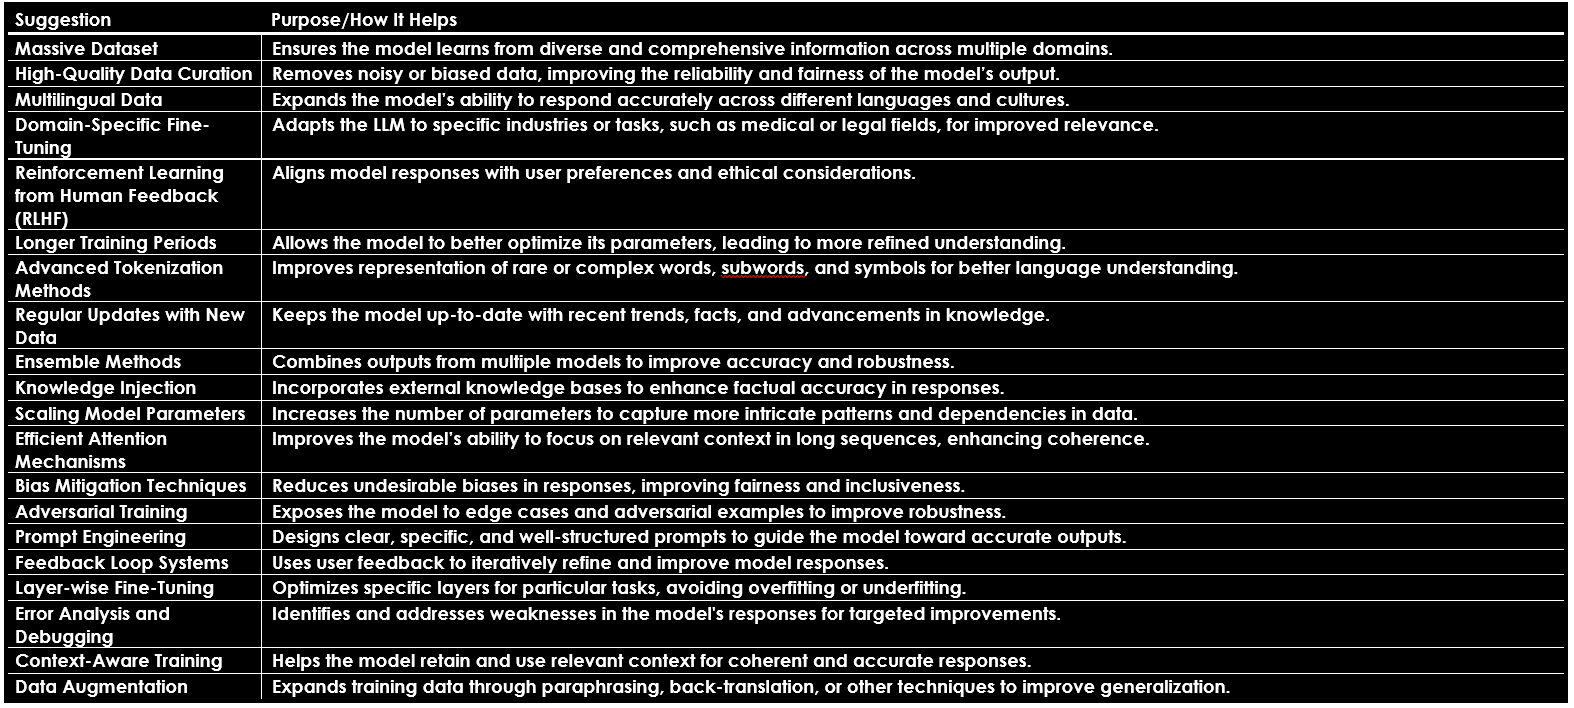